# Geostrophic adjustment and inertia-gravity waves
*MAQ - 32806, Chiel van Heerwaarden, Imme Benedict, and Menno Veerman 2020*

In this tutorial you will use the previously derived shallow water equations to study the concept of geostrophic adjustment (again pioneered by Carl-Gustaf Rossby). Geostrophic adjustment is the process that restores geostrophic and thermal wind balance after a disturbance, such as a big cloud system or a jet instability. In this tutorial, you will study how geostrophic adjustment leads to the formation of a low pressure system out of a disturbance, and you will learn about the role of inertia-gravity waves therein.
___

First, we load the required packages and set the physical constants.

In [3]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML, Video

figsize_s = 6,4
figsize_l = 9,4
plt.rcParams.update({'legend.fontsize' : 'medium'})

In [5]:
Omega = 7.29e-5    # Angular velocity of the earth.
g = 9.81           # Gravity constant.
a_earth = 6.371e6  # Earth radius.

___
# The shallow water equations for small perturbations
In this assignment, you are going to work with the linearized shallow water equations. This means that we assume that there is no background velocity, and that the velocities and height perturbations are small. Furthermore, to simplify the dynamics, we assume the Coriolis parameter $f$ to be a constant $f_0$. In addition to the derivation in class, we assume now that we have a flat bottom, with $z_b = 0$. Therefore, we can write $h$ directly into the conservation equations for horizontal momentum.

$$
\begin{eqnarray}
\nonumber
\dfrac{\partial u^\prime}{\partial t} & = & f_0 v^\prime - g\dfrac{\partial h^\prime}{\partial x}
\\
\nonumber
\dfrac{\partial v^\prime}{\partial t} & = & -f_0 u^\prime - g\dfrac{\partial h^\prime}{\partial y}
\\
\nonumber
\dfrac{\partial h^\prime}{\partial t} & = &
- \overline{h} \left( \dfrac{\partial u^\prime}{\partial x} +\dfrac{\partial v^\prime}{\partial y} \right)
\end{eqnarray}
$$

1. Explain the assumptions behind the equations above. Discuss in this explanation why can we neglect the advection terms if the perturbations are small, and why is $h$ replaced by $\overline{h}$ in the right-hand side of the third equation.
___

# The 2d shallow water experiment
Before we move to our own experiments, we are going to look at the results of the full 2d experiment discussed in the lecture first. We study an initially non-moving water layer in which we introduce a dip in the height that varies with $x$ and $y$. Below you find the results of the experiment, in which blue colours indicate a dip and red colours indicate a peak in the water. 


In [5]:
Video("animation2d.mp4", width = 600)


1. Explain what you see, is the behaviour what you expected? 

# The shallow water equations for our experiment
In our experiment, you are going to study the behavior of the simplified two-dimensional system. We study again an initially non-moving water layer in which we now introduce a dip in the height that only varies with $x$. The governing equations are

$$
\begin{eqnarray}
\nonumber
\dfrac{\partial u^\prime}{\partial t} & = & f_0 v^\prime - g \dfrac{\partial h^\prime}{\partial x}
\\
\nonumber
\dfrac{\partial v^\prime}{\partial t} & = & -f_0 u^\prime
\\
\nonumber
\dfrac{\partial h^\prime}{\partial t} & = &
- \overline{h} \dfrac{\partial u^\prime}{\partial x}
\end{eqnarray}
$$

1. Explain why the governing equations can be written as above if the initial perturbation has no gradients in $y$.
___

# Setting up the experiment
Below, you can specify the setup of the experiment. The `f_multiplier` is initially set to `1` and can be adjusted later to make the earth spin faster or slower.

In [6]:
f0_multiplier = 1.
lat = 45.
f0 = f0_multiplier * 2.*Omega*np.sin(np.deg2rad(lat))
L = a_earth * (2.*np.pi) * np.cos(np.deg2rad(lat))
L_dist = 1.e6
h_bar = 200.
h_prime = 0.1

With the conditions above, we can create our domain (ranging from `-L/2` to `L/2`). The initial condition (subscript `_0` of $u^{\prime}$, $v^{\prime}$ and $h^{\prime}$ are stored in variables `u_prime_0`, `v_prime_0` and `h_prime_0`.

In [7]:
# Here we initialize the grid and the horizontal velocities.
nx = 1501
x = np.linspace(-L/2., L/2., nx)
dx = x[1]-x[0]
u_prime_0 = np.zeros(nx)
v_prime_0 = np.zeros(nx)

# The perturbation in h has the shape of a Gaussian (normal distribution).
x_sigma = L_dist/6.
h_prime_0 = np.exp(-x**2/(2.*x_sigma**2))
h_prime_0 = - h_prime*h_prime_0/np.max(h_prime_0)

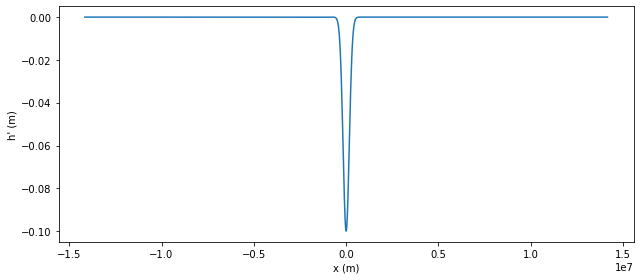

In [8]:
# This plot shows the shape of the initial perturbation
fig1 = plt.figure(figsize=figsize_l)
ax1 = plt.subplot(111)
ax1.plot(x, h_prime_0, 'C0-')
ax1.set_xlabel('x (m)')
ax1.set_ylabel('h\' (m)')
fig1.tight_layout()

1. Study the plot of the $h^{\prime}$ as a function of $x$. Is the perturbation really small? Compare its magnitude with that of $\overline{h}$.
2. Calculate the initial potential vorticity $q$ as a variable `q0` and plot it as a function of $x$.
3. Calculate the Rossby radius of deformation $\lambda_R \equiv \dfrac{\sqrt{g \overline{h}}}{f_0}$ for this experiment.
4. Replot $q$ and $h^{\prime}$ with the horizontal axis normalized by the Rossby radius $\lambda_R$ and normalize the axis between -8 and 8 $x/\lambda_R$. How large is the perturbation compared to the Rossby radius?

___
# Running the experiment
Now, you will run the model for `nt` timesteps with time increments of `dt` seconds. The output is saved every `ni` steps. The final result of $u^{\prime}$, $v^{\prime}$ and $h^{\prime}$ are stored in variables `u_prime`, `v_prime` and `h_prime`. Below you find an animation that shows the time evolution that can aid you in interpreting what is happening.

In [9]:
nt = 50000 #50000
ni = 500
dt = 10.

In [10]:
# MODEL INTEGRATOR, THIS MIGHT TAKE A WHILE!
u_prime = np.copy(u_prime_0)
v_prime = np.copy(v_prime_0)
h_prime = np.copy(h_prime_0)

h_prime_out = np.zeros((nt//ni+1, nx))
h_prime_out[0,:] = h_prime_0

for n in range(1,nt+1):
    u_prime += dt * (   f0*v_prime - g*np.gradient(h_prime, dx) )
    v_prime += dt * ( - f0*u_prime )
    h_prime += dt * ( - h_bar*np.gradient(u_prime, dx) )
    
    if (n%ni == 0):
        h_prime_out[n//ni,:] = h_prime[:]

In [11]:
# ANIMATION CREATION PHASE 1.
# Set up the figure, the axis, and the plot element we want to animate
fig1, ax1 = plt.subplots(figsize=figsize_l)
x_min, x_max = min(x), max(x)
h_prime_min, h_prime_max = np.min(h_prime_out), np.max(h_prime_out)
h_prime_min -= 0.05*(h_prime_max-h_prime_min)
h_prime_max += 0.05*(h_prime_max-h_prime_min)
ax1.set_xlim(x_min, x_max)
ax1.set_ylim(h_prime_min, h_prime_max)
ax1.set_xlabel('x (m)')
ax1.set_ylabel('h\' (m)')
ax1.plot(x, h_prime_out[0,:], 'b:')
line, = ax1.plot([], [], lw=2)
fig1.tight_layout()
plt.close()

In [12]:
# ANIMATION CREATION PHASE 2
# Initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    line.set_data(x, h_prime_out[i,:])
    return (line,)

# Call the animator. Keyword blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig1, animate, init_func=init,
                               frames=h_prime_out.shape[0], interval=40, blit=True)

HTML(anim.to_jshtml())

___
# Analysis of the experiment
Below you find the end result of the experiment. All three variables $h^{\prime}$, $u^{\prime}$ and $v^{\prime}$ are plotted.

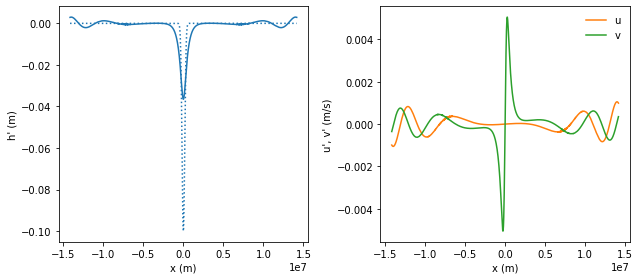

In [13]:
fig1 = plt.figure(figsize=figsize_l)
ax1 = plt.subplot(121)
ax1.plot(x, h_prime, 'C0-')
ax1.plot(x, h_prime_0, 'C0:')
ax1.set_xlabel('x (m)')
ax1.set_ylabel('h\' (m)')
ax2 = plt.subplot(122)
ax2.plot(x, u_prime, 'C1-', label='u')
ax2.plot(x, v_prime, 'C2-', label='v')
ax2.set_xlabel('x (m)')
ax2.set_ylabel('u\', v\' (m/s)')
ax2.legend(loc=0, frameon=False);
fig1.tight_layout()

1. What do you see in the figure above? Is this what you expected? Why does the surface not become flat?
2. Replot the figure above, but normalize $x$ again with $\lambda_R$ and limit the range between -8 and 8. Within how many Rossby radii is the initial perturbation contained?
3. Calculate the potential vorticity at the end of the simulation and compare it to the initial value. How has it changed?
4. Rerun the experiment for an earth that spins five times faster (set `f0_multiplier=5.`) and for one that spins five times slower (set `f0_multiplier=0.2`). What do you observe?
5. What is the influence of the rotation rate on the phase velocity and group velocity of the waves? Can you link your observations to the dispersion relation of inertia-gravity waves?
___

#  Geostrophic adjustment
With the help of the potential vorticity, it is possible for this experiment to predict the final steady state out of the initial conditions. The formulation of the steady state is this specific experiment is

$$
\begin{eqnarray}
\nonumber
0 & = & f_0 v^\prime - g \dfrac{\partial h^\prime}{\partial x}
\\
\nonumber
0 & = & -f_0 u^\prime
\\
\nonumber
0 & = &
- \overline{h} \dfrac{\partial u^\prime}{\partial x}
\end{eqnarray}
$$

We know that throughout the geostrophic adjustment the potential vorticity has not changed, thus

$$
q = q_0
$$
___
1. Why is the process that you have modelled called geostrophic adjustment? TIPS: Think about how to define geostrophic wind speed in the shallow water equations. Don't forget that $\dfrac{\partial h^{\prime}}{\partial y} = 0$ in this experiment.
2. Derive the equation that relates the final height $h^{\prime}$ to the initial potential vorticity $q_0$. This is a differential equation, you do not have to solve it.
___

Below you find a solver for the final state as a function of the initial potential vorticity.

In [14]:
# MAKE SURE THAT YOU HAVE CALCULATED THE INITIAL POTENTIAL VORTICITY
# AS A VARIABLE q_0
q_0 = f0 / (h_bar + h_prime_0)

def calc_steady_state():
    c1 = g/(f0*dx**2)

    # Matrix solver
    M = np.zeros((nx, nx))

    for i in range(1,nx-1):
        M[i,i-1] = c1
        M[i,i  ] = -(2.*c1 + q_0[i])
        M[i,i+1] = c1

    M[ 0, 0] = 1.
    M[-1,-1] = 1.

    h_prime_mat = -1.*np.ones(nx)*f0 + q_0*h_bar
    h_prime_mat[ 0] = 0
    h_prime_mat[-1] = 0

    h_prime = np.linalg.inv(M).dot(h_prime_mat)
    v_prime = g/f0*np.gradient(h_prime, dx)
    
    return h_prime, v_prime

h_prime_inv, v_prime_inv = calc_steady_state()

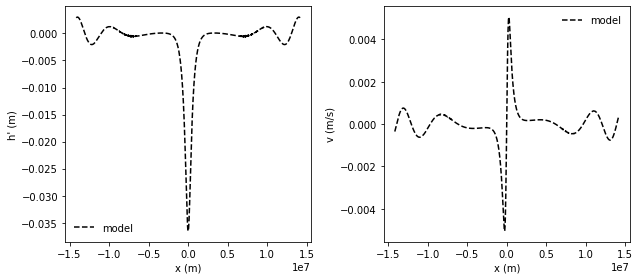

In [15]:
fig1 = plt.figure(figsize=figsize_l)
ax1 = plt.subplot(121)
# ADD HERE THE SOLUTION FOR H (h_inv)
ax1.plot(x, h_prime, 'k--', label='model')
ax1.set_xlabel('x (m)')
ax1.set_ylabel('h\' (m)')
ax1.legend(loc=0, frameon=False)
ax2 = plt.subplot(122)
# ADD HERE THE SOLUTION FOR V (v_inv)
ax2.plot(x, v_prime, 'k--', label='model')
ax2.set_xlabel('x (m)')
ax2.set_ylabel('v (m/s)')
ax2.legend(loc=0, frameon=False);
fig1.tight_layout()

1. Add the solution acquired from the matrix inversion to the plot above, and normalize $x$ with the Rossby radius. Is the result the same? If not, explain the differences.
2. Explain the pattern in the final solution for $v$. What are the similarities between this pattern and a zonal cross section through the center of a low pressure system in the lower troposphere? 

___
End of tutorial.
___

# Answers setting up the experiment

1. Yes, h'  is really small (-0.1 meter maximum compared to $\overline{h}$ of 200 meter)
2. See Figure below
3. Rossby radius of deformation: $\lambda_R \equiv \dfrac{\sqrt{g \overline{h}}}{f_0} = \dfrac{\sqrt{2000}}{f_0}= $ 433.78 km
4. About 1-1.5 times the Rossby radius, see second set of Figures below

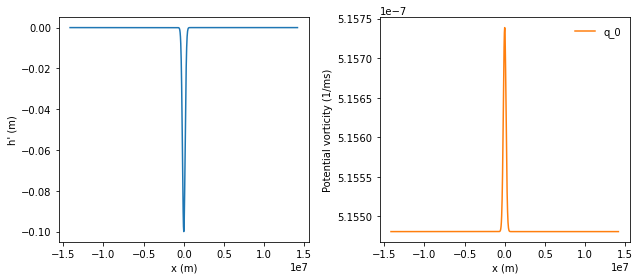

In [131]:

fig1 = plt.figure(figsize=figsize_l)
ax1 = plt.subplot(121)
ax1.plot(x, h_prime_0, 'C0-')
ax1.set_xlabel('x (m)')
ax1.set_ylabel('h\' (m)')
ax2 = plt.subplot(122)
ax2.plot(x, q_0, 'C1-', label='q_0')
ax2.set_xlabel('x (m)')
ax2.set_ylabel('Potential vorticity (1/ms)')
ax2.legend(loc=0, frameon=False);
fig1.tight_layout()

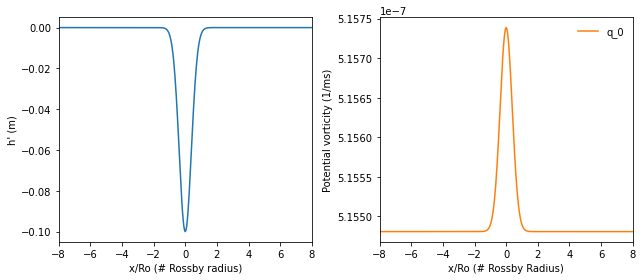

In [132]:
Ro = (2000)**0.5/f0
fig1 = plt.figure(figsize=figsize_l)
ax1 = plt.subplot(121)
ax1.plot(x/Ro, h_prime_0, 'C0-')
ax1.set_xlabel('x/Ro (# Rossby radius)')
ax1.set_ylabel('h\' (m)')
ax1.set_xlim(-8,8)
ax2 = plt.subplot(122)
ax2.plot(x/Ro, q_0, 'C1-', label='q_0')
ax2.set_xlabel('x/Ro (# Rossby Radius)')
ax2.set_ylabel('Potential vorticity (1/ms)')
ax2.set_xlim(-8,8)
ax2.legend(loc=0, frameon=False);
fig1.tight_layout()

# Answers analyze the experiment
1. One thing we see is that even in the final state h' is not flat (i.e. equal to 0) at the place of the original perturbation. We see from the final v' and u' that: $\dfrac{\partial u'}{\partial t} = 0$, therefore:
$f_0 v' = g\dfrac{\partial h'}{\partial x}$, so there is a balance between the Coriolis force and the pressure gradient force (Geostrophic balance)
2. The perturbations are contained within 4 Rossby Radii, see dashed vertical lines in figure below. 
3. As expected $q_{final}$ is equal to $q_0$, since the potential vorticity is conserved
4. Things we see:
- Amplitude decreases for faster spinning earth, faster waves (smaller period), moreover final state has larger amplitude
- For slower moving earth oposite happens, slow oscillating waves with higher amplitude, while the final amplitude is much smaller

That the amplitude is intuitive, since the $\dfrac{\partial h'}{\partial x}$ is proportional to $fv'$ in the final state
5. 

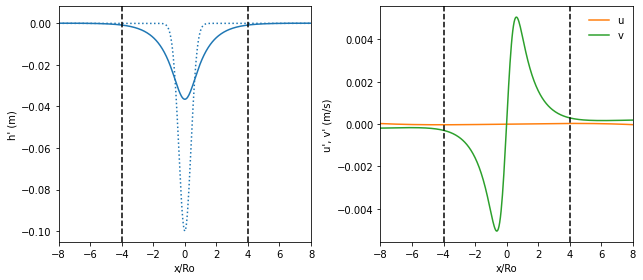

In [133]:
Ro = (2000)**0.5/f0
fig1 = plt.figure(figsize=figsize_l)
ax1 = plt.subplot(121)
ax1.plot(x/Ro, h_prime, 'C0-')
ax1.plot(x/Ro, h_prime_0, 'C0:')
ax1.axvline(x = 4, linestyle='--', color = 'black')
ax1.axvline(x = -4, linestyle='--', color = 'black')
ax1.set_xlabel('x/Ro')
ax1.set_ylabel('h\' (m)')
ax1.set_xlim(-8,8)
ax2 = plt.subplot(122)
ax2.plot(x/Ro, u_prime, 'C1-', label='u')
ax2.plot(x/Ro, v_prime, 'C2-', label='v')
ax2.set_xlabel('x/Ro')
ax2.set_ylabel('u\', v\' (m/s)')
ax2.legend(loc=0, frameon=False);
ax2.set_xlim(-8,8)
#ax2.vlines(-4,-0.002,0.002)
ax2.axvline(x = 4, linestyle='--', color = 'black')
ax2.axvline(x = -4, linestyle='--', color = 'black')
fig1.tight_layout()
fig1.savefig("FinalState_f0.png")

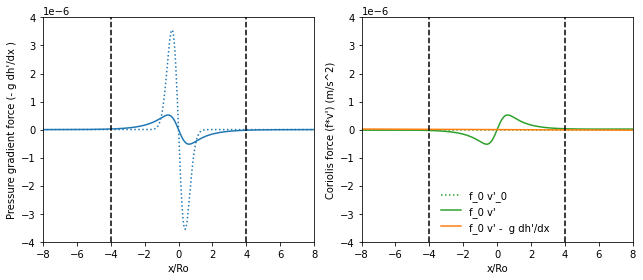

In [153]:
Ro = (2000)**0.5/f0
g = 9.81
fig1 = plt.figure(figsize=figsize_l)
ax1 = plt.subplot(121)
ax1.plot(x/Ro, -g*np.gradient(h_prime,dx), 'C0-')
ax1.plot(x/Ro, -g*np.gradient(h_prime_0,dx), 'C0:')
ax1.axvline(x = 4, linestyle='--', color = 'black')
ax1.axvline(x = -4, linestyle='--', color = 'black')
ax1.set_xlabel('x/Ro')
ax1.set_ylabel('Pressure gradient force (- g dh\'/dx )')
ax1.set_xlim(-8,8)
ax1.set_ylim(-4e-6,4e-6)
ax2 = plt.subplot(122)
ax2.plot(x/Ro, f0*v_prime_0, 'C2:', label='f_0 v\'_0')
ax2.plot(x/Ro, f0*v_prime, 'C2-', label='f_0 v\'')
ax2.plot(x/Ro,  g*np.gradient(h_prime,dx) - f0*v_prime, 'C1-', label='f_0 v\' -  g dh\'/dx ')
ax2.set_xlabel('x/Ro')
ax2.set_ylabel('Coriolis force (f*v\')'' (m/s^2)')
ax2.legend(loc=0, frameon=False);
ax2.set_xlim(-8,8)
ax2.set_ylim(-4e-6,4e-6)
#ax2.vlines(-4,-0.002,0.002)
ax2.axvline(x = 4, linestyle='--', color = 'black')
ax2.axvline(x = -4, linestyle='--', color = 'black')
fig1.tight_layout()
fig1.savefig("FinalStateForces_f0.png")

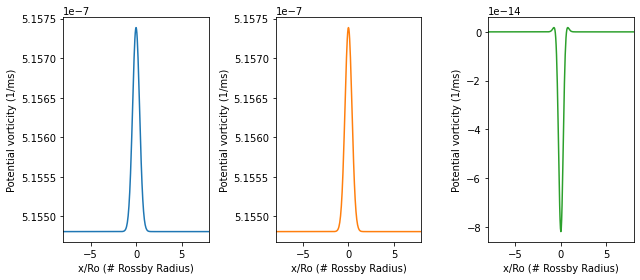

In [22]:
#q_0 = f0 / (h_bar + h_prime_0)
q_final = (f0+ np.gradient(v_prime, dx))/(h_bar+h_prime)
Ro = (2000)**0.5/f0
fig1 = plt.figure(figsize=figsize_l)
ax1 = plt.subplot(131)
ax1.plot(x/Ro, q_0, 'C0-')
ax1.set_xlabel('x/Ro (# Rossby Radius)')
ax1.set_ylabel('Potential vorticity (1/ms)')
ax1.set_xlim(-8,8)
ax2 = plt.subplot(132)
ax2.plot(x/Ro, q_final, 'C1-', label='q_0')
#ax2.plot(x/Ro, q_final - q_0, 'C2-')
ax2.set_xlabel('x/Ro (# Rossby Radius)')
ax2.set_ylabel('Potential vorticity (1/ms)')
ax2.set_xlim(-8,8)
#ax2.legend(loc=0, frameon=False);
ax3 = plt.subplot(133)
ax3.plot(x/Ro, q_final-q_0, 'C2-', label='q_0')
#ax2.plot(x/Ro, q_final - q_0, 'C2-')
ax3.set_xlabel('x/Ro (# Rossby Radius)')
ax3.set_ylabel('Potential vorticity (1/ms)')
ax3.set_xlim(-8,8)
#ax2.legend(loc=0, frameon=False);
fig1.tight_layout()

In [115]:
#Rerun of experiment
f0_multiplier = 5.0
lat = 45.
f0 = f0_multiplier * 2.*Omega*np.sin(np.deg2rad(lat))
L = a_earth * (2.*np.pi) * np.cos(np.deg2rad(lat))
L_dist = 1.e6
h_bar = 200.
h_prime = 0.1

# MODEL INTEGRATOR, THIS MIGHT TAKE A WHILE!
u_prime = np.copy(u_prime_0)
v_prime = np.copy(v_prime_0)
h_prime = np.copy(h_prime_0)

h_prime_out = np.zeros((nt//ni+1, nx))
v_prime_out = np.zeros((nt//ni+1, nx))

h_prime_out[0,:] = h_prime_0
v_prime_out[0,:] = v_prime_0

for n in range(1,nt+1):
    u_prime += dt * (   f0*v_prime - g*np.gradient(h_prime, dx) )
    v_prime += dt * ( - f0*u_prime )
    h_prime += dt * ( - h_bar*np.gradient(u_prime, dx) )
    
    if (n%ni == 0):
        h_prime_out[n//ni,:] = h_prime[:]
        v_prime_out[n//ni,:] = v_prime[:]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


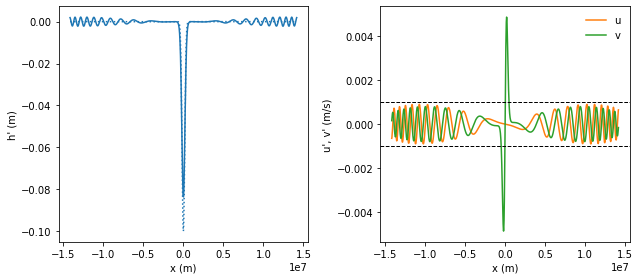

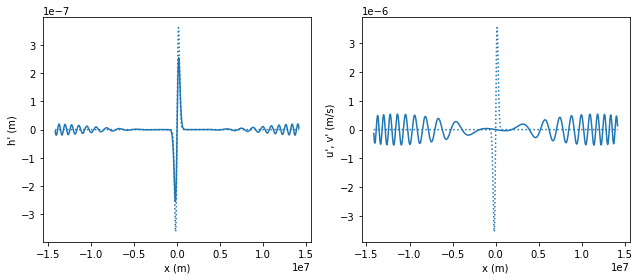

In [120]:
fig1 = plt.figure(figsize=figsize_l)
ax1 = plt.subplot(121)
ax1.plot(x, h_prime, 'C0-')
ax1.plot(x, h_prime_0, 'C0:')
ax1.set_xlabel('x (m)')
ax1.set_ylabel('h\' (m)')
ax2 = plt.subplot(122)
ax2.plot(x, u_prime, 'C1-', label='u')
ax2.plot(x, v_prime, 'C2-', label='v')
ax2.set_xlabel('x (m)')
ax2.set_ylabel('u\', v\' (m/s)')
ax2.axhline(0.001,c='k',linestyle="--",linewidth=1.0)
ax2.axhline(-0.001,c='k',linestyle="--",linewidth=1.0)
ax2.legend(loc=0, frameon=False);
fig1.tight_layout()

fig2 = plt.figure(figsize=figsize_l)
ax3 = plt.subplot(121)
ax3.plot(x, np.gradient(h_prime,dx), 'C0-')
ax3.plot(x, np.gradient(h_prime_0,dx), 'C0:')
ax3.set_xlabel('x (m)')
ax3.set_ylabel('h\' (m)')
#ax3.set_ylim(-0.0001,0.0001)
ax4 = plt.subplot(122)
ax4.plot(x, np.gradient(h_prime,dx)*g-f0*v_prime, 'C0-')
ax4.plot(x, np.gradient(h_prime_0,dx)*g-f0*v_prime_0, 'C0:')
ax4.set_xlabel('x (m)')
ax4.set_ylabel('u\', v\' (m/s)')
ax4.legend(loc=0, frameon=False);
fig2.tight_layout()

In [118]:
g

9.81

In [106]:
# ANIMATION CREATION PHASE 1.
# Set up the figure, the axis, and the plot element we want to animate
fig1, ax1 = plt.subplots(figsize=figsize_l)
x_min, x_max = min(x), max(x)
h_prime_min, h_prime_max = np.min(h_prime_out), np.max(h_prime_out)
h_prime_min -= 0.05*(h_prime_max-h_prime_min)
h_prime_max += 0.05*(h_prime_max-h_prime_min)
ax1.set_xlim(x_min, x_max)
ax1.set_ylim(h_prime_min, h_prime_max)
ax1.set_xlabel('x (m)')
ax1.set_ylabel('h\' (m)')
ax1.plot(x, h_prime_out[0,:], 'b:')
line, = ax1.plot([], [], lw=2)
fig1.tight_layout()
plt.close()

# ANIMATION CREATION PHASE 2
# Initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    line.set_data(x, h_prime_out[i,:])
    return (line,)

# Call the animator. Keyword blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig1, animate, init_func=init,
                               frames=h_prime_out.shape[0], interval=40, blit=True)

HTML(anim.to_jshtml())

In [107]:
# ANIMATION CREATION PHASE 1.
# Set up the figure, the axis, and the plot element we want to animate
fig1, ax1 = plt.subplots(figsize=figsize_l)
x_min, x_max = min(x), max(x)
v_prime_min, v_prime_max = np.min(v_prime_out), np.max(v_prime_out)
v_prime_min -= 0.05*(v_prime_max-v_prime_min)
v_prime_max += 0.05*(v_prime_max-v_prime_min)
ax1.set_xlim(x_min, x_max)
ax1.set_ylim(v_prime_min, v_prime_max)
ax1.set_xlabel('x (m)')
ax1.set_ylabel('h\' (m)')
ax1.plot(x, v_prime_out[0,:], 'b:')
line, = ax1.plot([], [], lw=2)
fig1.tight_layout()
plt.close()

# ANIMATION CREATION PHASE 2
# Initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    line.set_data(x, v_prime_out[i,:])
    return (line,)

# Call the animator. Keyword blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig1, animate, init_func=init,
                               frames=v_prime_out.shape[0], interval=40, blit=True)

HTML(anim.to_jshtml())

In [1]:
q_0 = f0 / (h_bar + h_prime_0)
Ro = (2000)**0.5/f0

h_prime_inv, v_prime_inv = calc_steady_state()
fig1 = plt.figure(figsize=figsize_l)
ax1 = plt.subplot(121)
# ADD HERE THE SOLUTION FOR H (h_inv)
ax1.plot(x/Ro, h_prime, 'k--', label='model')
ax1.set_xlabel('x/Ro (m)')
ax1.set_ylabel('h\' (m)')
ax1.legend(loc=0, frameon=False)
ax2 = plt.subplot(122)
# ADD HERE THE SOLUTION FOR V (v_inv)
ax2.plot(x/Ro, v_prime, 'k--', label='model')
ax2.set_xlabel('x/Ro (m)')
ax2.set_ylabel('v (m/s)')
ax2.legend(loc=0, frameon=False);
fig1.tight_layout()

NameError: name 'f0' is not defined

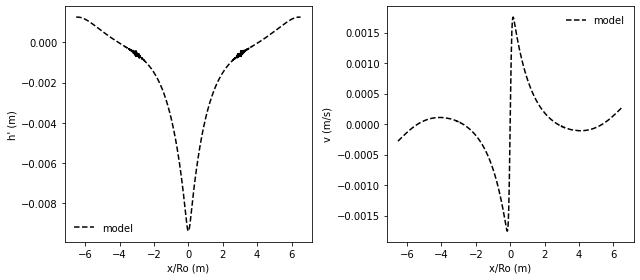

In [80]:
q_0 = f0 / (h_bar + h_prime_0)
Ro = (2000)**0.5/f0

h_prime_inv, v_prime_inv = calc_steady_state()
fig1 = plt.figure(figsize=figsize_l)
ax1 = plt.subplot(121)
# ADD HERE THE SOLUTION FOR H (h_inv)
ax1.plot(x/Ro, h_prime, 'k--', label='model')
ax1.set_xlabel('x/Ro (m)')
ax1.set_ylabel('h\' (m)')
ax1.legend(loc=0, frameon=False)
ax2 = plt.subplot(122)
# ADD HERE THE SOLUTION FOR V (v_inv)
ax2.plot(x/Ro, v_prime, 'k--', label='model')
ax2.set_xlabel('x/Ro (m)')
ax2.set_ylabel('v (m/s)')
ax2.legend(loc=0, frameon=False);
fig1.tight_layout()

# Answers Geostrophic adjustment
1. It is not completely the same, since the final state of the experiment is not in equilibrium yet. The inverse gives the 'true' equilibrium. 


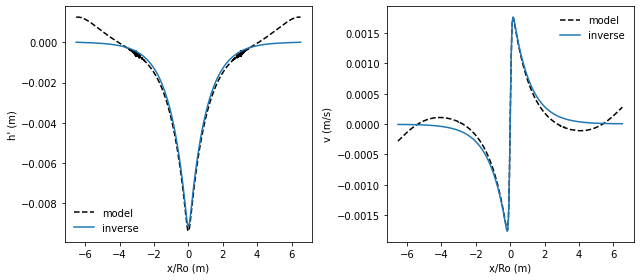

In [81]:
fig1 = plt.figure(figsize=figsize_l)
ax1 = plt.subplot(121)
# ADD HERE THE SOLUTION FOR H (h_inv)
ax1.plot(x/Ro, h_prime, 'k--', label='model')
ax1.plot(x/Ro, h_prime_inv, 'C0-', label='inverse')
ax1.set_xlabel('x/Ro (m)')
ax1.set_ylabel('h\' (m)')
ax1.legend(loc=0, frameon=False)
ax2 = plt.subplot(122)
# ADD HERE THE SOLUTION FOR V (v_inv)
ax2.plot(x/Ro, v_prime, 'k--', label='model')
ax2.plot(x/Ro, v_prime_inv, 'C0-', label='inverse')
ax2.set_xlabel('x/Ro (m)')
ax2.set_ylabel('v (m/s)')
ax2.legend(loc=0, frameon=False);
fig1.tight_layout()

## ANALYSIS OF SPEED OF ADJUSTMENT

In [21]:
x[681:820]/423000

array([-3.07815114, -3.03354025, -2.98892937, -2.94431848, -2.89970759,
       -2.85509671, -2.81048582, -2.76587494, -2.72126405, -2.67665316,
       -2.63204228, -2.58743139, -2.5428205 , -2.49820962, -2.45359873,
       -2.40898785, -2.36437696, -2.31976607, -2.27515519, -2.2305443 ,
       -2.18593342, -2.14132253, -2.09671164, -2.05210076, -2.00748987,
       -1.96287899, -1.9182681 , -1.87365721, -1.82904633, -1.78443544,
       -1.73982456, -1.69521367, -1.65060278, -1.6059919 , -1.56138101,
       -1.51677013, -1.47215924, -1.42754835, -1.38293747, -1.33832658,
       -1.2937157 , -1.24910481, -1.20449392, -1.15988304, -1.11527215,
       -1.07066127, -1.02605038, -0.98143949, -0.93682861, -0.89221772,
       -0.84760683, -0.80299595, -0.75838506, -0.71377418, -0.66916329,
       -0.6245524 , -0.57994152, -0.53533063, -0.49071975, -0.44610886,
       -0.40149797, -0.35688709, -0.3122762 , -0.26766532, -0.22305443,
       -0.17844354, -0.13383266, -0.08922177, -0.04461089,  0.  

In [67]:
nt = 50000 #50000
ni = 500
dt = 10.

f0_multiplier = 1.
lat = 45.
f0 = f0_multiplier * 2.*Omega*np.sin(np.deg2rad(lat))
L = a_earth * (2.*np.pi) * np.cos(np.deg2rad(lat))
L_dist = 1.e6
h_bar = 200.
h_prime = 0.1

# MAKE SURE THAT YOU HAVE CALCULATED THE INITIAL POTENTIAL VORTICITY
# AS A VARIABLE q_0
q_0 = f0 / (h_bar + h_prime_0)

def calc_steady_state():
    c1 = g/(f0*dx**2)

    # Matrix solver
    M = np.zeros((nx, nx))

    for i in range(1,nx-1):
        M[i,i-1] = c1
        M[i,i  ] = -(2.*c1 + q_0[i])
        M[i,i+1] = c1

    M[ 0, 0] = 1.
    M[-1,-1] = 1.

    h_prime_mat = -1.*np.ones(nx)*f0 + q_0*h_bar
    h_prime_mat[ 0] = 0
    h_prime_mat[-1] = 0

    h_prime = np.linalg.inv(M).dot(h_prime_mat)
    v_prime = g/f0*np.gradient(h_prime, dx)
    
    return h_prime, v_prime

h_prime_inv, v_prime_inv = calc_steady_state()

# MODEL INTEGRATOR, THIS MIGHT TAKE A WHILE!
u_prime = np.copy(u_prime_0)
v_prime = np.copy(v_prime_0)
h_prime = np.copy(h_prime_0)

h_prime_out = np.zeros((nt//ni+1, nx))

h_prime_dev = np.zeros((nt//ni+1))
h_prime_out[0,:] = h_prime_0

for n in range(1,nt+1):
    u_prime += dt * (   f0*v_prime - g*np.gradient(h_prime, dx) )
    v_prime += dt * ( - f0*u_prime )
    h_prime += dt * ( - h_bar*np.gradient(u_prime, dx) )
    
    if (n%ni == 0):
        h_prime_out[n//ni,:] = h_prime[:]
        h_prime_dev[n//ni] = np.nanmean(np.abs(h_prime[681:820]/h_prime_inv[681:820]))

In [63]:
h_prime_dev

array([0.        , 0.59636923, 0.89161527, 1.35158762, 1.94040765,
       2.35397821, 1.59575933, 1.85395859, 1.36678055, 1.26132266,
       1.5401665 , 1.49855204, 1.2926864 , 1.05179585, 0.8611302 ,
       0.76194315, 0.75809252, 0.82710137, 0.93305505, 1.03876729,
       1.11516661, 1.14668606, 1.13239199, 1.08346224, 1.01825837,
       0.95653166, 0.91423942, 0.90008326, 0.91432742, 0.94985426,
       0.99490168, 1.03660553, 1.06438904, 1.07239186, 1.06045346,
       1.03356717, 1.00009952, 0.96933969, 0.94905088, 0.94363134,
       0.95328658, 0.97432976, 1.00043885, 1.02447663, 1.04037287,
       1.04459181, 1.0368486 , 1.0199502 , 0.99886439, 0.97930541,
       0.96622598, 0.96260217, 0.96879852, 0.98263662, 1.00010557,
       1.01649549, 1.02764163, 1.03095777, 1.02600923, 1.01450612,
       0.99975083, 0.98570946, 0.97596295, 0.97281061, 0.97674584,
       0.98641863, 0.99907017, 1.01130593, 1.01999449, 1.02305717,
       1.01995266, 1.01174714, 1.00077054, 0.98996505, 0.98210

In [121]:
nt = 50000 #50000
ni = 500
dt = 10.

f0_multiplier = 2.
lat = 45.
f0 = f0_multiplier * 2.*Omega*np.sin(np.deg2rad(lat))
L = a_earth * (2.*np.pi) * np.cos(np.deg2rad(lat))
L_dist = 1.e6
h_bar = 200.
h_prime = 0.1

# MAKE SURE THAT YOU HAVE CALCULATED THE INITIAL POTENTIAL VORTICITY
# AS A VARIABLE q_0
q_0 = f0 / (h_bar + h_prime_0)

def calc_steady_state():
    c1 = g/(f0*dx**2)

    # Matrix solver
    M = np.zeros((nx, nx))

    for i in range(1,nx-1):
        M[i,i-1] = c1
        M[i,i  ] = -(2.*c1 + q_0[i])
        M[i,i+1] = c1

    M[ 0, 0] = 1.
    M[-1,-1] = 1.

    h_prime_mat = -1.*np.ones(nx)*f0 + q_0*h_bar
    h_prime_mat[ 0] = 0
    h_prime_mat[-1] = 0

    h_prime = np.linalg.inv(M).dot(h_prime_mat)
    v_prime = g/f0*np.gradient(h_prime, dx)
    
    return h_prime, v_prime

h_prime_inv2, v_prime_inv2 = calc_steady_state()

# MODEL INTEGRATOR, THIS MIGHT TAKE A WHILE!
u_prime = np.copy(u_prime_0)
v_prime = np.copy(v_prime_0)
h_prime = np.copy(h_prime_0)

h_prime_out2 = np.zeros((nt//ni+1, nx))

h_prime_dev2 = np.zeros((nt//ni+1))
h_prime_out[0,:] = h_prime_0

for n in range(1,nt+1):
    u_prime += dt * (   f0*v_prime - g*np.gradient(h_prime, dx) )
    v_prime += dt * ( - f0*u_prime )
    h_prime += dt * ( - h_bar*np.gradient(u_prime, dx) )
    
    if (n%ni == 0):
        h_prime_out2[n//ni,:] = h_prime[:]
        h_prime_dev2[n//ni] = np.nanmean(np.abs(h_prime[681:820]/h_prime_inv2[681:820]))

In [122]:
nt = 50000 #50000
ni = 500
dt = 10.

f0_multiplier = 0.5
lat = 45.
f0 = f0_multiplier * 2.*Omega*np.sin(np.deg2rad(lat))
L = a_earth * (2.*np.pi) * np.cos(np.deg2rad(lat))
L_dist = 1.e6
h_bar = 200.
h_prime = 0.1

# MAKE SURE THAT YOU HAVE CALCULATED THE INITIAL POTENTIAL VORTICITY
# AS A VARIABLE q_0
q_0 = f0 / (h_bar + h_prime_0)

def calc_steady_state():
    c1 = g/(f0*dx**2)

    # Matrix solver
    M = np.zeros((nx, nx))

    for i in range(1,nx-1):
        M[i,i-1] = c1
        M[i,i  ] = -(2.*c1 + q_0[i])
        M[i,i+1] = c1

    M[ 0, 0] = 1.
    M[-1,-1] = 1.

    h_prime_mat = -1.*np.ones(nx)*f0 + q_0*h_bar
    h_prime_mat[ 0] = 0
    h_prime_mat[-1] = 0

    h_prime = np.linalg.inv(M).dot(h_prime_mat)
    v_prime = g/f0*np.gradient(h_prime, dx)
    
    return h_prime, v_prime

h_prime_inv3, v_prime_inv3 = calc_steady_state()

# MODEL INTEGRATOR, THIS MIGHT TAKE A WHILE!
u_prime = np.copy(u_prime_0)
v_prime = np.copy(v_prime_0)
h_prime = np.copy(h_prime_0)

h_prime_out3 = np.zeros((nt//ni+1, nx))

h_prime_dev3 = np.zeros((nt//ni+1))
h_prime_out[0,:] = h_prime_0

for n in range(1,nt+1):
    u_prime += dt * (   f0*v_prime - g*np.gradient(h_prime, dx) )
    v_prime += dt * ( - f0*u_prime )
    h_prime += dt * ( - h_bar*np.gradient(u_prime, dx) )
    
    if (n%ni == 0):
        h_prime_out3[n//ni,:] = h_prime[:]
        h_prime_dev3[n//ni] = np.nanmean(np.abs(h_prime[681:820]/h_prime_inv3[681:820]))

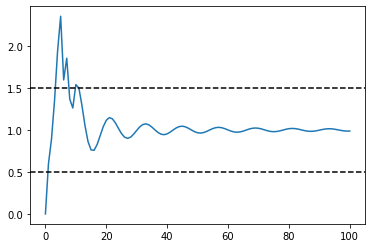

In [123]:
plt.plot(h_prime_dev)
plt.axhline(1.5,color="k",linestyle="--")
plt.axhline(0.5,color="k",linestyle="--")

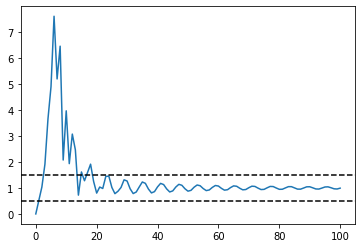

In [124]:
plt.plot(h_prime_dev2)
plt.axhline(1.5,color="k",linestyle="--")
plt.axhline(0.5,color="k",linestyle="--")

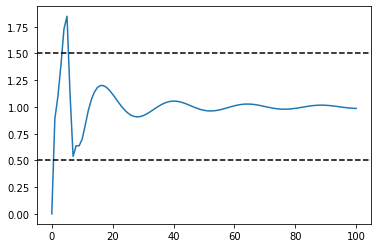

In [114]:
plt.plot(h_prime_dev3)
plt.axhline(1.5,color="k",linestyle="--")
plt.axhline(0.5,color="k",linestyle="--")

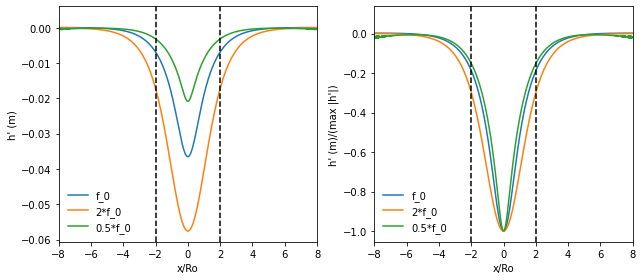

In [96]:
f0 =  2.*Omega*np.sin(np.deg2rad(lat))
Ro = (2000)**0.5/f0
Ro2 = (2000)**0.5/(2*f0)
Ro3 = (2000)**0.5/(0.5*f0)
fig1 = plt.figure(figsize=figsize_l)
ax1 = plt.subplot(121)
ax1.plot(x/Ro, h_prime_out[-1,::], 'C0-',label="f_0")
#ax1.plot(x/Ro, h_prime_0, 'C0:')
ax1.plot(x/Ro2, h_prime_out2[-1,::], 'C1-',label="2*f_0")
#ax1.plot(x/Ro2, h_prime_0, 'C1:')
ax1.plot(x/Ro3, h_prime_out3[-1,::], 'C2-',label="0.5*f_0")
#ax1.plot(x/Ro3, h_prime_0, 'C2:')
ax1.axvline(x = 2, linestyle='--', color = 'black')
ax1.axvline(x = -2, linestyle='--', color = 'black')
ax1.set_xlabel('x/Ro')
ax1.set_ylabel('h\' (m)')
ax1.legend(loc=0, frameon=False)
ax1.set_xlim(-8,8)
ax2 = plt.subplot(122)
ax2.plot(x/Ro, h_prime_out[-1,::]/np.abs(np.nanmin(h_prime_out[-1,::])), 'C0-', label= "f_0")
ax2.plot(x/Ro2, h_prime_out2[-1,::]/np.abs(np.nanmin(h_prime_out2[-1,::])), 'C1-',label="2*f_0")
ax2.plot(x/Ro3, h_prime_out3[-1,::]/np.abs(np.nanmin(h_prime_out3[-1,::])), 'C2-',label="0.5*f_0")
ax2.axvline(x = 2, linestyle='--', color = 'black')
ax2.axvline(x = -2, linestyle='--', color = 'black')
ax2.set_xlabel('x/Ro')
ax2.set_ylabel('h\' (m)/(max |h\'|)')
ax2.set_xlim(-8,8)
ax2.legend(loc=0, frameon=False)
fig1.tight_layout()
fig1.savefig("FinalState_f0_f1_f2.png")

In [57]:
np.abs(np.nanmin(h_prime_out2[-1,::]))


0.08366037415904845

2.0